In [46]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import random

%matplotlib inline
import matplotlib as mpl
mpl.style.use("ggplot")

%load_ext autoreload
%autoreload 2

from pputils import *
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
edges = pd.read_csv('panama_papers.edges.csv', dtype='unicode')
edges = edges.dropna(axis = 1, how = 'all')

addresses = pd.read_csv('panama_papers.nodes.address.csv')
addresses = addresses.dropna(axis = 1, how = 'all')

entities = pd.read_csv('panama_papers.nodes.entity.csv', dtype='unicode')
entities = entities.dropna(axis = 1, how = 'all')

intermediaries = pd.read_csv('panama_papers.nodes.intermediary.csv')
intermediaries = intermediaries.dropna(axis = 1, how = 'all')

officers = pd.read_csv('panama_papers.nodes.officer.csv')
officers = officers.dropna(axis = 1, how = 'all')

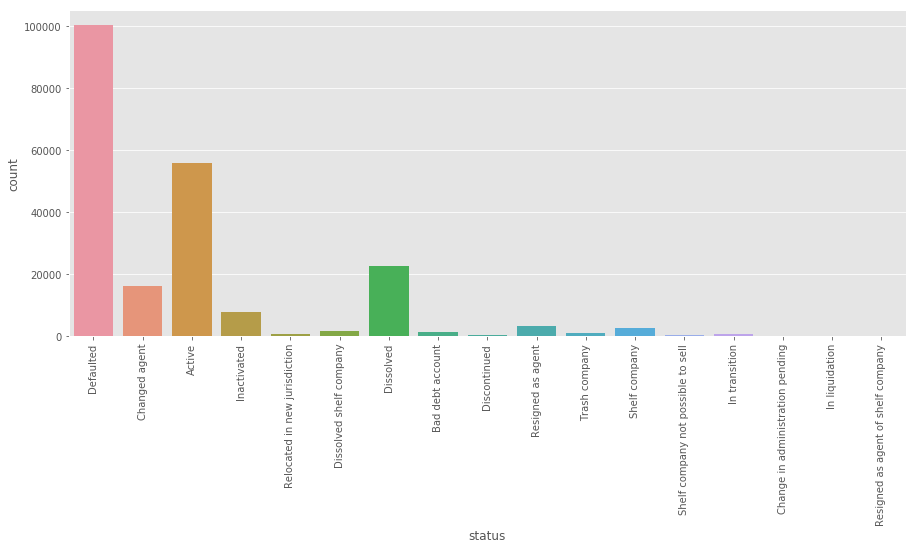

In [3]:
f, ax = plt.subplots(figsize=(15, 6))

#rotateTickLabels(ax, 90, 'x')
g = sns.countplot(x='status', data=entities)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [4]:
# Use pandas groupby() frunction to determine loactions with the highest incorporation rates
# Here we're counting how many entities there are per jurisdiction

shell_locations = entities.groupby(['jurisdiction_description'])["name"].count().reset_index(name="Entity Count")
shell_locations.sort_values("Entity Count", ascending= False)

jurisdiction_description  Entity Count
3    British Virgin Islands        113645
13                   Panama         48360
0                   Bahamas         15914
16               Seychelles         15182
12                     Niue          9611
15                    Samoa          5307
2          British Anguilla          3253
10                   Nevada          1260
6                 Hong Kong           452
18           United Kingdom           148
1                    Belize           130
4                Costa Rica            78
5                    Cyprus            76
19                  Uruguay            52
11              New Zealand            47
8                    Jersey            39
20                  Wyoming            37
9                     Malta            28
7               Isle Of Man             8
14           Ras Al Khaimah             2
17                Singapore             1

Text(0.5,1,'Home Country (n=10)')

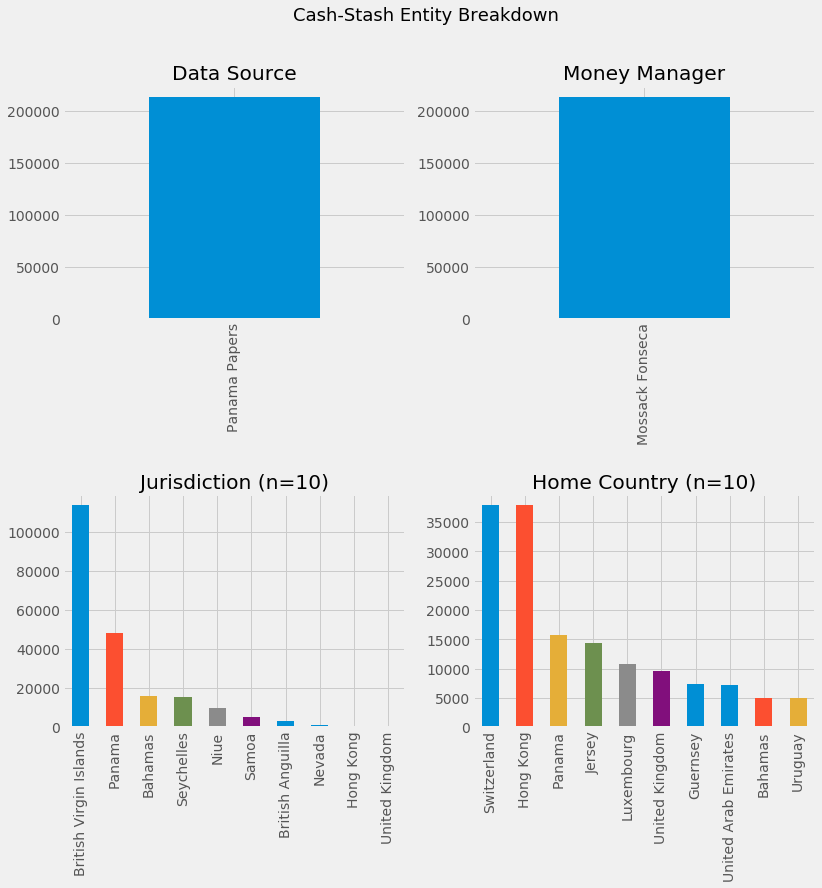

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

f, axarr = plt.subplots(2, 2, figsize=(12, 11))
f.subplots_adjust(hspace=0.75)
plt.suptitle('Cash-Stash Entity Breakdown', fontsize=18)

entities['sourceID'].value_counts().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Data Source")

entities['service_provider'].value_counts(dropna=False).plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Money Manager")

entities['jurisdiction_description'].value_counts().head(10).plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Jurisdiction (n=10)")

entities['countries'].value_counts(dropna=False).head(10).plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Home Country (n=10)")

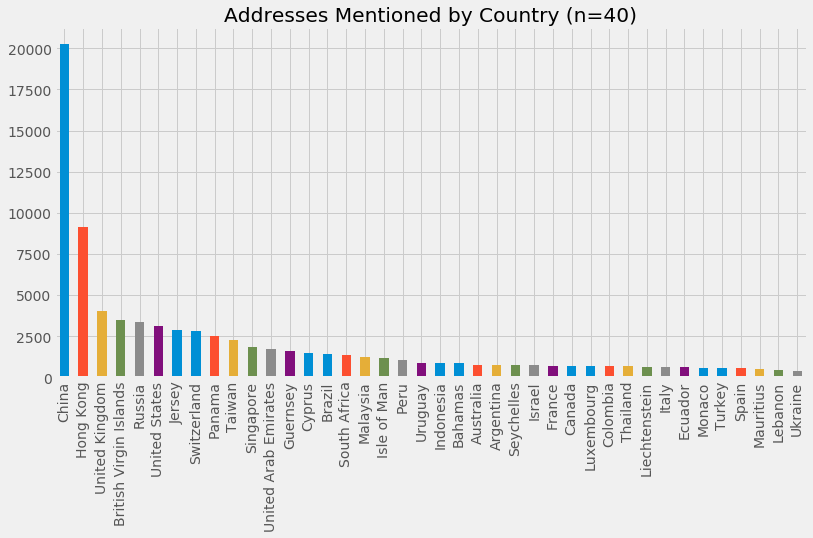

In [6]:
#Addresses
addresses['countries'].value_counts().head(40).plot.bar(
    title='Addresses Mentioned by Country (n=40)', figsize=(12, 6)
)

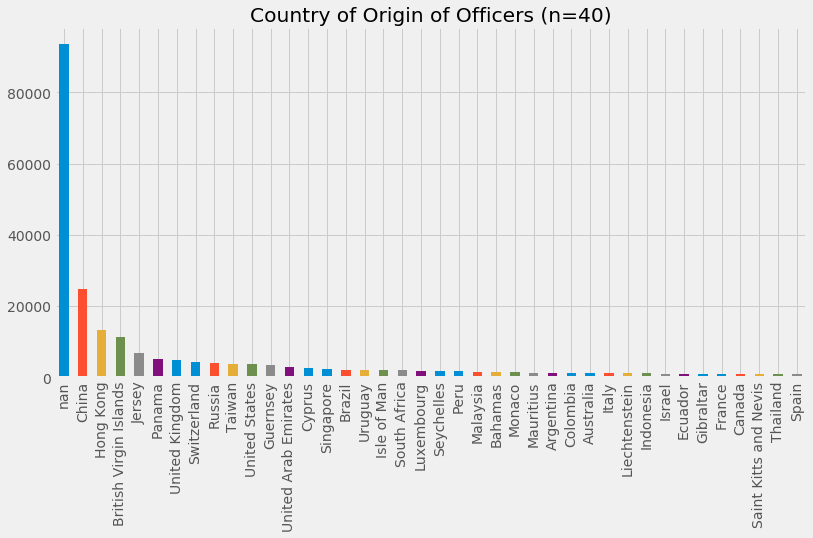

In [123]:
# Officers
officers['countries'].value_counts(dropna=False).head(40).plot.bar(
    title='Country of Origin of Officers (n=40)', figsize=(12, 6)
)

In [211]:
# https://www.kaggle.com/vamsikrishna/happiness-index-and-terrorism/data
# happiness and terrorirsm !! 

In [212]:
# index downloaded 

In [214]:
# qog 7oukoumaa 
# https://qog.pol.gu.se/data/datadownloads/qogbasicdata

In [7]:
happiness = pd.read_csv('happiness.csv')

In [9]:
happiness.head()

Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596

In [10]:
cpi = pd.read_csv('cpi.csv')

In [12]:
cpi.head()

CPI Rank      Country Country Code                   Region  \
0         1  New Zealand          NZL             Asia Pacific   
1         1      Denmark          DNK  Europe and Central Asia   
2         3      Finland          FIN  Europe and Central Asia   
3         4       Sweden          SWE  Europe and Central Asia   
4         5  Switzerland          CHE  Europe and Central Asia   

   Corruption Perceptions Index (CPI)  Standard Error  \
0                                  90            2.56   
1                                  90            2.46   
2                                  89            1.46   
3                                  88            1.33   
4                                  86            1.57   

   Lower Confidence Interval  Upper Confidence Interval  World Bank CPIA  \
0                         86                         94              NaN   
1                         86                         94              NaN   
2                         87                         92              NaN   
3                         85                         90              NaN   
4                         83                         89              NaN   

   World Economic Forum EOS   ...     African Development Bank CPIA  \
0                      90.0   ...                               NaN   
1                      85.0   ...                               NaN   
2                      91.0   ...                               NaN   
3                      86.0   ...                               NaN   
4                      80.0   ...                               NaN   

   IMD World Competitiveness Yearbook  \
0                                95.0   
1                                98.0   
2                                94.0   
3                                86.0   
4                                88.0   

   Bertelsmann Foundation Sustainable Governance Index  \
0                                               99.0     
1                                               99.0     
2                                               90.0     
3                                               90.0     
4                                               90.0     

   World Justice Project Rule of Law Index  \
0                                     79.0   
1                                     85.0   
2                                     85.0   
3                                     85.0   
4                                      NaN   

   PRS International Country Risk Guide  Varities of Democracy Project  \
0                                  93.0                            NaN   
1                                  93.0                            NaN   
2                                  93.0                            NaN   
3                                  93.0                            NaN   
4                                  85.0                            NaN   

   Economist Intelligence Unit Country Ratings  \
0                                         90.0   
1                                         90.0   
2                                         90.0   
3                                         90.0   
4                                         90.0   

   Freedom House Nations in Transit Ratings  PERC Asia Risk Guide  Sources  
0                                       NaN                   NaN        7  
1                                       NaN                   NaN        7  
2                                       NaN                   NaN        7  
3                                       NaN                   NaN        7  
4                                       NaN                   NaN        6  

[5 rows x 22 columns]

In [36]:
qog = pd.read_excel('qog.xlsx', sep='\t')

In [38]:
qog.head()

ccode        cname ccodealp  ccodecow  ccodewb        version  \
0      4  Afghanistan      AFG     700.0      4.0  QoGBasCSJan18   
1      8      Albania      ALB     339.0      8.0  QoGBasCSJan18   
2     12      Algeria      DZA     615.0     12.0  QoGBasCSJan18   
3     20      Andorra      AND     232.0     20.0  QoGBasCSJan18   
4     24       Angola      AGO     540.0     24.0  QoGBasCSJan18   

   ajr_settmort  al_ethnic  al_language  al_religion    ...      wvs_imprel  \
0      4.540098   0.769345     0.614146     0.271684    ...             NaN   
1           NaN   0.220426     0.039925     0.471852    ...             NaN   
2      4.359270   0.339400     0.442662     0.009128    ...        3.881811   
3           NaN   0.713946     0.684785     0.232569    ...             NaN   
4      5.634789   0.786720     0.787019     0.627644    ...             NaN   

   wvs_pmi12  wvs_psarmy  wvs_psdem  wvs_psexp  wvs_pssl  wvs_relacc  \
0        NaN         NaN        NaN        NaN       NaN         NaN   
1        NaN         NaN        NaN        NaN       NaN         NaN   
2   1.976494    1.836735   3.446242   2.183652  1.841885    3.710616   
3        NaN         NaN        NaN        NaN       NaN         NaN   
4        NaN         NaN        NaN        NaN       NaN         NaN   

   wvs_satfin  wvs_subh  wvs_trust  
0         NaN       NaN        NaN  
1         NaN       NaN        NaN  
2    5.988125  3.805579   0.179286  
3         NaN       NaN        NaN  
4         NaN       NaN        NaN  

[5 rows x 471 columns]

In [52]:
terrorism = pd.read_csv('terrorism.csv', encoding="ISO-8859-1")

In [53]:
terrorism.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region   ...    addnotes scite1 scite2  scite3  \
0  Dominican Republic       2   ...         NaN    NaN    NaN     NaN   
1              Mexico       1   ...         NaN    NaN    NaN     NaN   
2         Philippines       5   ...         NaN    NaN    NaN     NaN   
3              Greece       8   ...         NaN    NaN    NaN     NaN   
4               Japan       4   ...         NaN    NaN    NaN     NaN   

   dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0      PGIS        0         0        0       0      NaN  
1      PGIS        0         1        1       1      NaN  
2      PGIS       -9        -9        1       1      NaN  
3      PGIS       -9        -9        1       1      NaN  
4      PGIS       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [54]:
terrorism = terrorism.groupby(['country', 'country_txt']).count()['iyear'].to_frame()

In [56]:
terrorism.reset_index(inplace= True)

In [59]:
terrorism = terrorism.rename(columns={'iyear':'count'})

In [61]:
terrorism.head()

country  country_txt  count
0        4  Afghanistan  12731
1        5      Albania     80
2        6      Algeria   2743
3        7      Andorra      1
4        8       Angola    499